In [89]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\escag\es_repo280720\Homework\Unit4\Health_Analitics_II\healthcare\train_data.csv')

In [90]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [92]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


### Formatting data

In [93]:
df.select_dtypes(include=np.number).columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit'],
      dtype='object')

In [94]:
df.select_dtypes(exclude=np.number).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')

In [95]:
dict1b={'case_id': np.int32, 'Hospital_code': np.int8, 'City_Code_Hospital': np.int8,
       'Available Extra Rooms in Hospital': np.int8, 'Bed Grade': np.float32, 'patientid': np.int32,
       'City_Code_Patient': np.float32, 'Visitors with Patient': np.int8, 'Admission_Deposit': np.float32,
      }

In [96]:
df=pd.read_csv(r'C:\Users\escag\es_repo280720\Homework\Unit4\Health_Analitics_II\healthcare\train_data.csv', dtype=dict1b)

In [97]:
#Checking for Null Values
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [99]:
#Replace Null values
df['Bed Grade'].fillna(-1, inplace=True)
df['City_Code_Patient'].fillna(-1, inplace=True)

In [100]:
age_bins=['0-10','11-20','21-30', '31-40','41-50', '51-60', '61-70','71-80', '81-90', '91-100']

In [101]:
df.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [102]:
df.Stay.replace('More than 100 Days', '>100', inplace=True)

## Exploratory Data Analysis

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

### Create a new column with average Length of Stay (LOS)

In [104]:
dict_stay={'0-10':5, '41-50': 45, '31-40': 35, '11-20': 15, '51-60': 55, '21-30' : 25, '71-80': 75, '>100': 105, '81-90' : 85, '61-70': 65, '91-100': 95}
df['AvgLOS']=df.Stay.copy().replace(dict_stay)
df.AvgLOS=df.AvgLOS.astype('int8')

Text(0.5, 1, 'Correlation matrix')

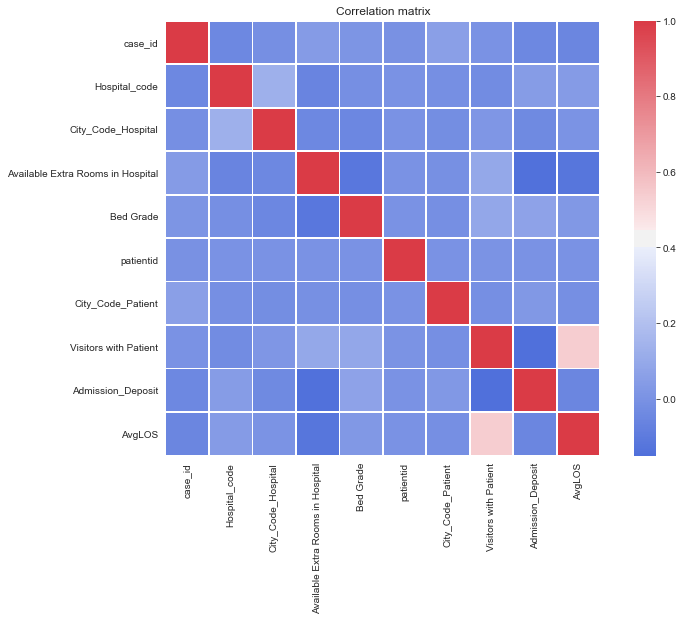

In [105]:
f, ax=plt.subplots(figsize=(12,8))
corr_map=sns.diverging_palette(260,10, as_cmap=True)
sns.heatmap(df.corr(),cmap=corr_map, linewidths=0.8, square=True); # Best correlation is 'Stay' with 'Visitors with Patient'
plt.title('Correlation matrix')

In [106]:
stay_bins=['0-10','11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100', '>100']

Text(0.5, 1.0, 'Patients Stay Length')

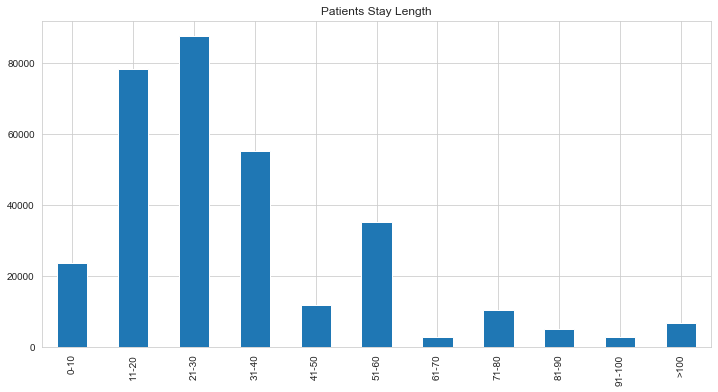

In [107]:
df['Stay'].value_counts()[stay_bins].plot(kind='bar',figsize=(12,6))
plt.title('Patients Stay Length')

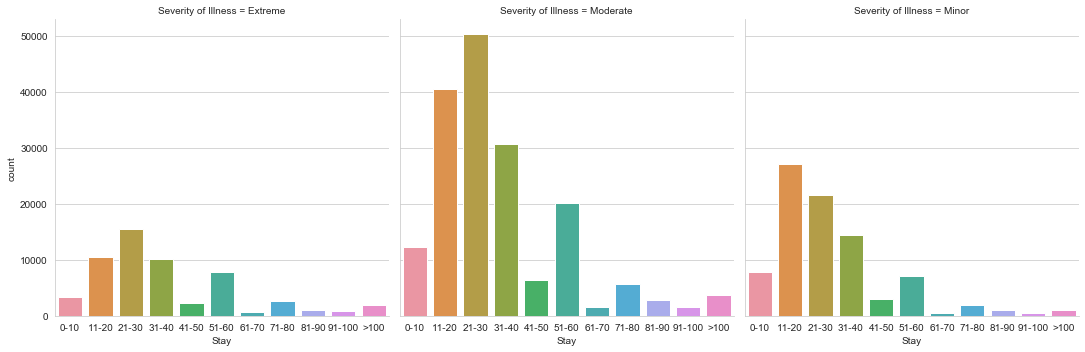

In [108]:
sns.catplot(x='Stay', kind='count', col='Severity of Illness', order=stay_bins,data=df)

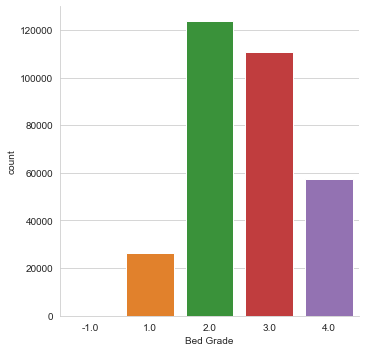

In [109]:
sns.catplot(x='Bed Grade', kind='count', data=df)
#sns.catplot(x='Stay', kind='count', col='Bed Grade', col_wrap=2, data=df, order=stay_bins,hue='Severity of Illness')

Text(0.5, 1.02, 'Number of Cases by Length of Stay and Department')

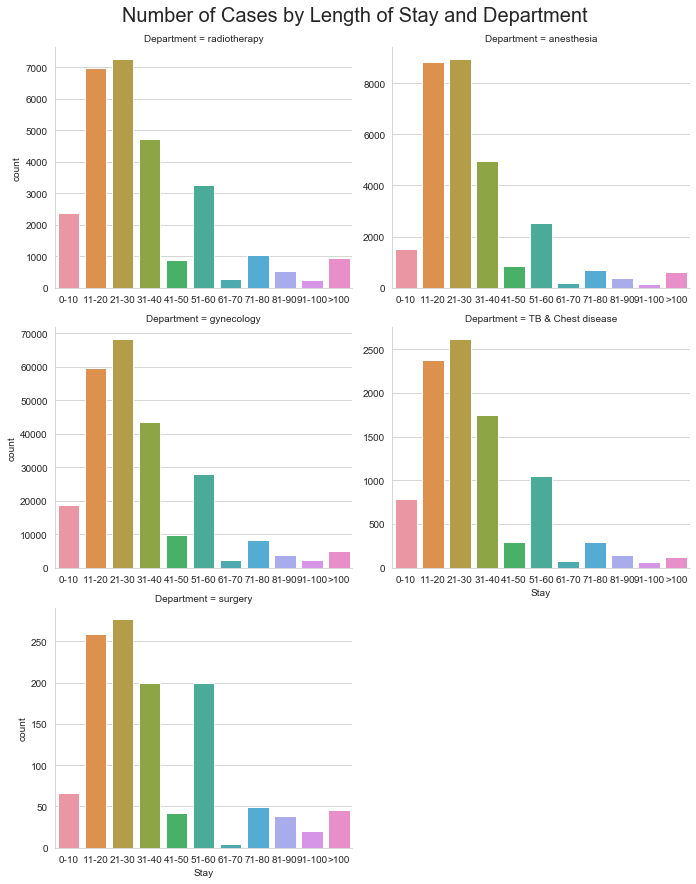

In [110]:
sns.catplot(x='Stay', kind='count', col='Department',order=stay_bins, col_wrap=2, data=df, height=4, aspect=1.2, sharey=False,sharex=False)
plt.suptitle('Number of Cases by Length of Stay and Department', y=1.02, fontsize=20 )

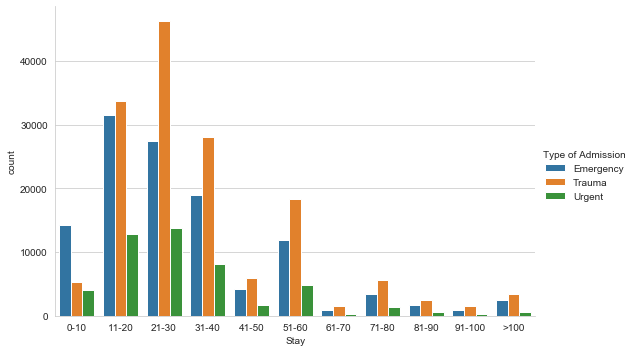

In [111]:
sns.catplot(x='Stay', kind='count', hue='Type of Admission', order=stay_bins,data=df, aspect=1.5)


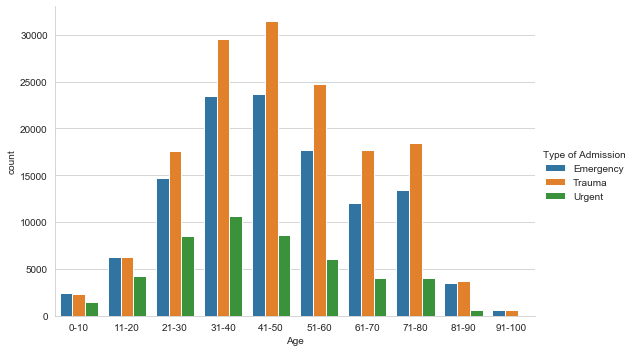

In [112]:
sns.catplot(x='Age', kind='count', order=age_bins, hue='Type of Admission', data=df, aspect=1.5)


Text(0.5, 1, 'Number of Cases by Admission and Age Group')

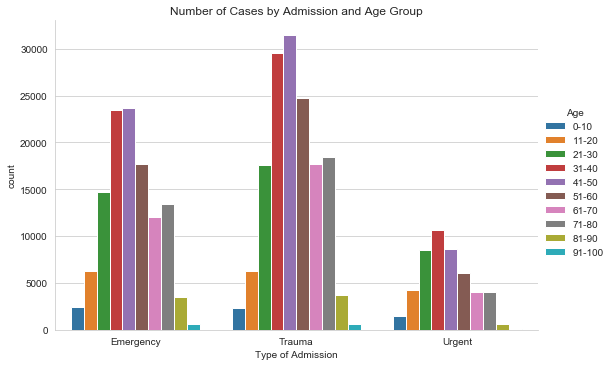

In [113]:
sns.catplot(hue='Age', hue_order=age_bins, kind='count', x='Type of Admission', data=df, aspect=1.5)
plt.title('Number of Cases by Admission and Age Group')

Text(0.5, 1.02, 'Number of Cases by Length of Stay and Age Group')

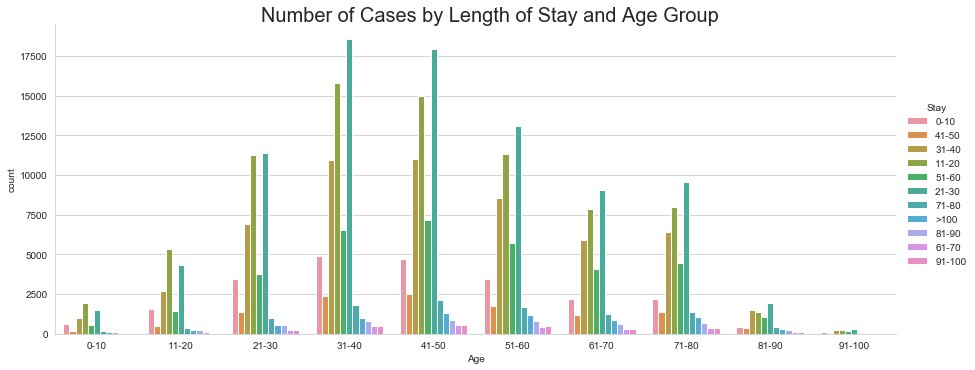

In [114]:
sns.catplot(x='Age', kind='count', hue='Stay',order=age_bins, data=df, height=5,aspect=2.5)
plt.suptitle('Number of Cases by Length of Stay and Age Group', y=1.02, fontsize=20 )

Text(0.5, 1.02, 'Hospital Code Frequency by Length of Stay')

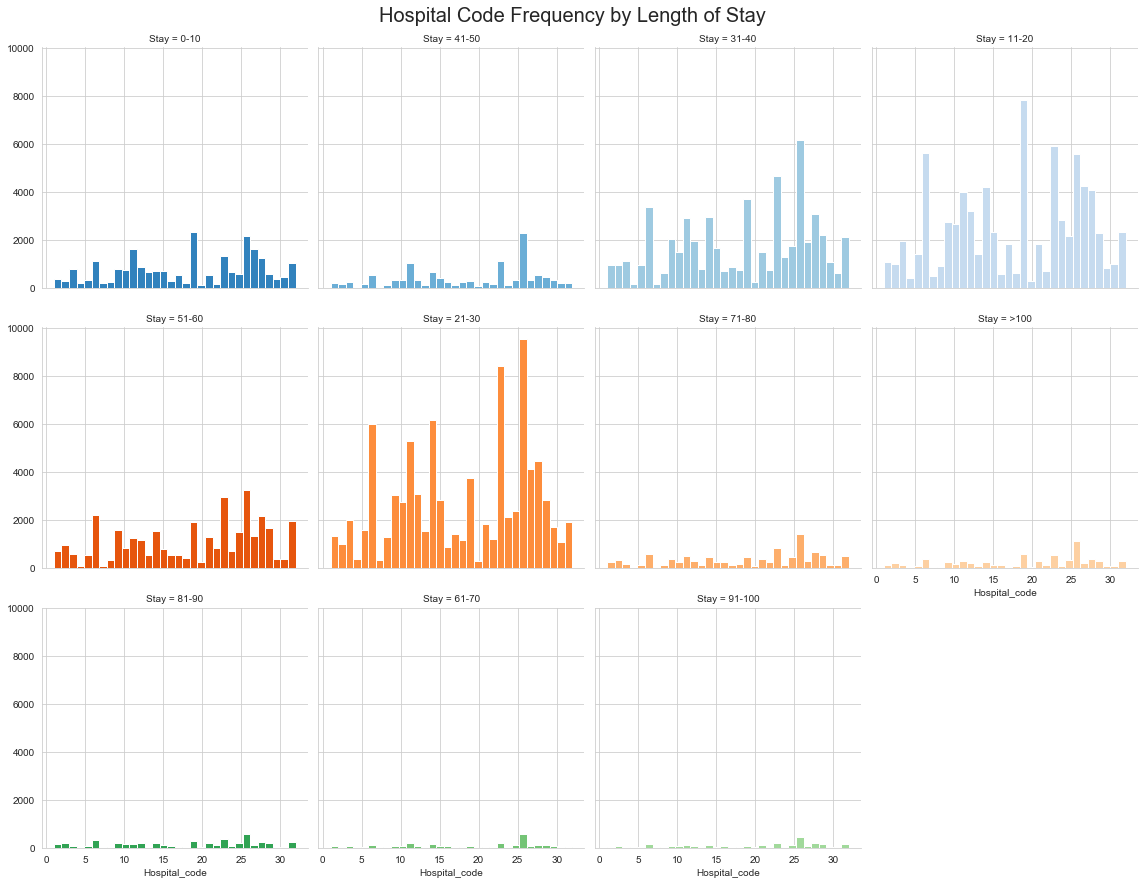

In [115]:
## Look at Hospitals
grid = sns.FacetGrid(df, col="Stay", hue="Stay", palette="tab20c",
                     col_wrap=4, height=4, aspect=1 )
grid.map(plt.hist, 'Hospital_code', bins=32)
plt.suptitle('Hospital Code Frequency by Length of Stay', y=1.02, fontsize=20 )

Text(0.5, 1.02, 'Stay Length by Hospital Code')

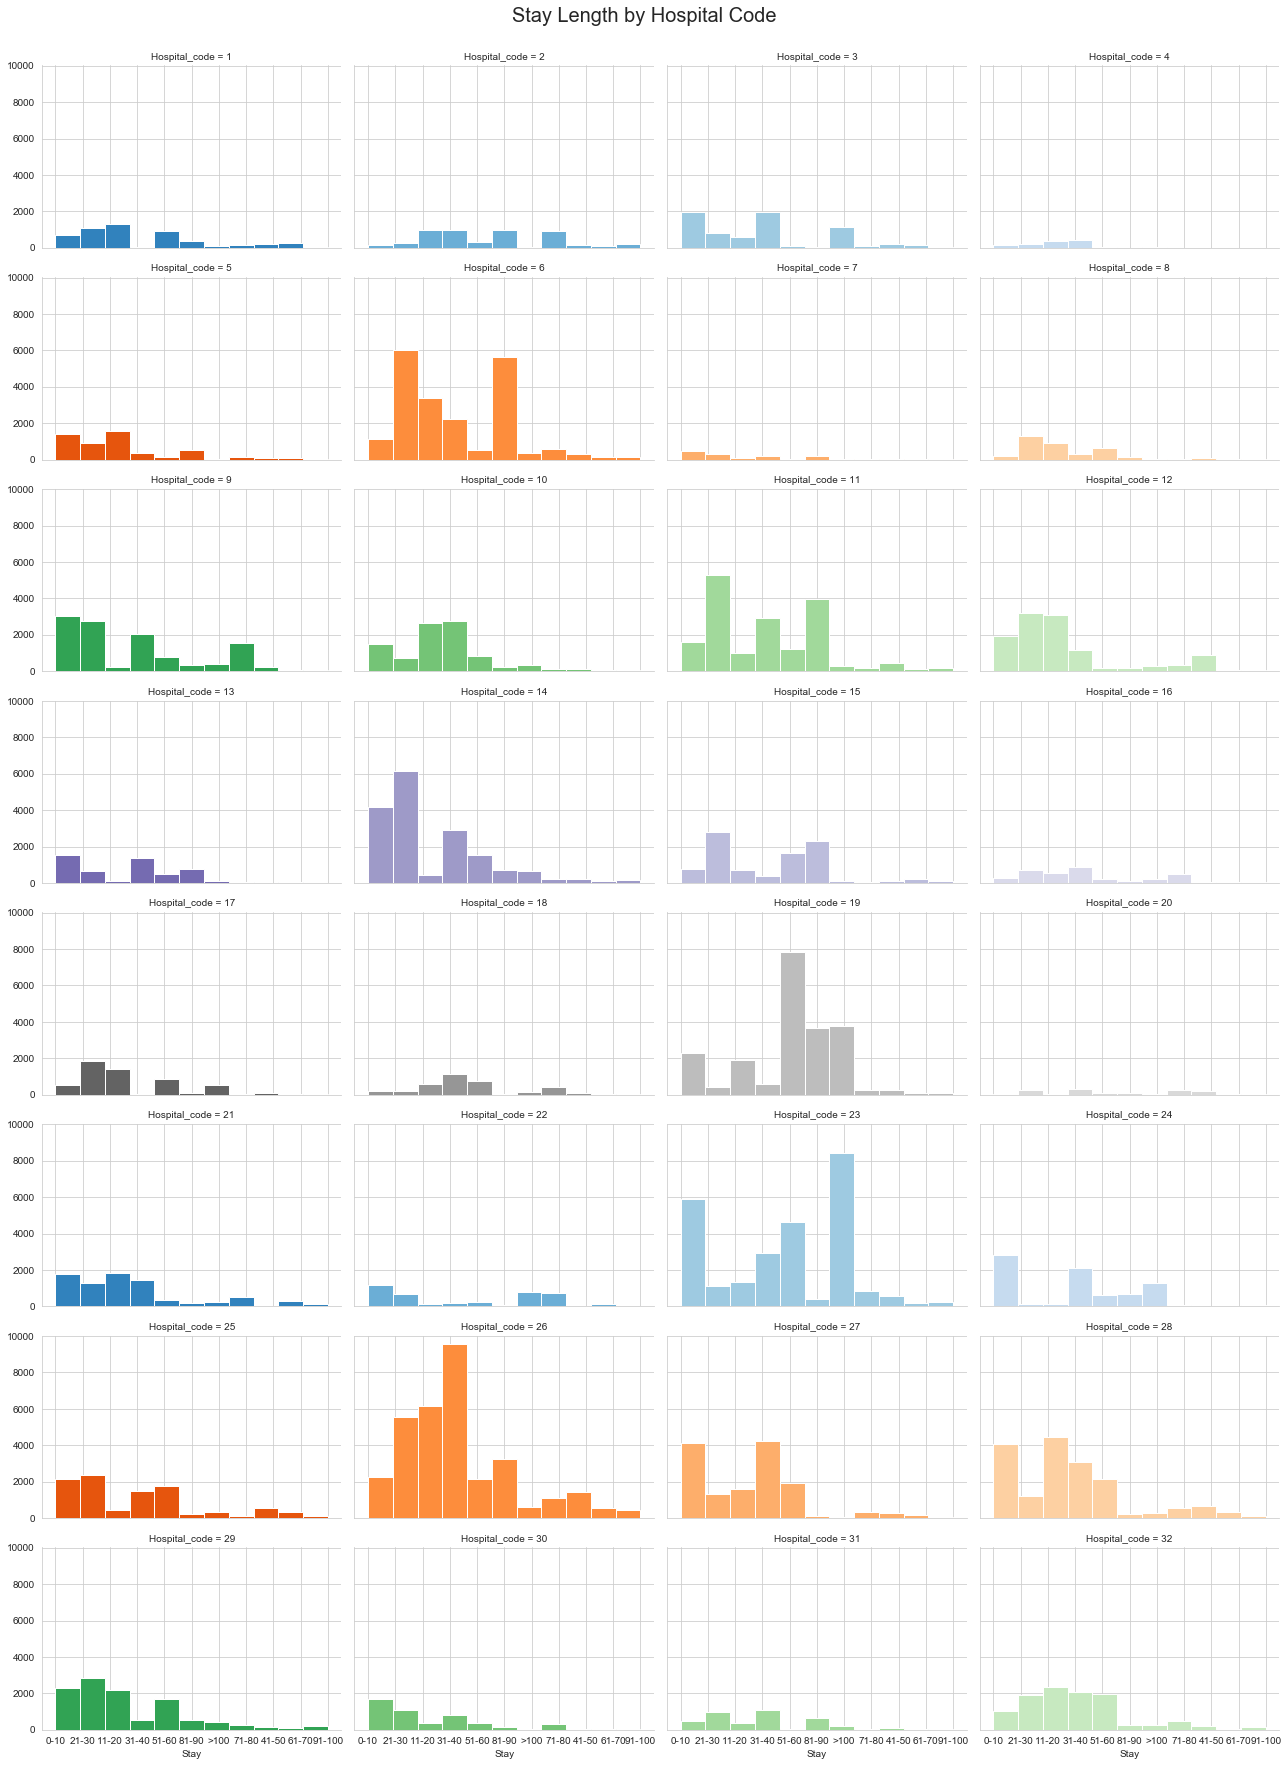

In [116]:
grid = sns.FacetGrid(df, col="Hospital_code", hue="Hospital_code", palette="tab20c",
                     col_wrap=4, height=3, aspect=1.5)
grid.map(plt.hist, 'Stay', bins=11)
plt.suptitle('Stay Length by Hospital Code', y=1.02, fontsize=20 )

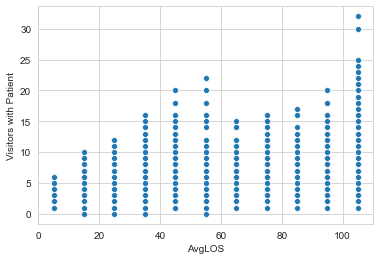

In [117]:
sns.scatterplot(x='AvgLOS', y='Visitors with Patient', data=df)

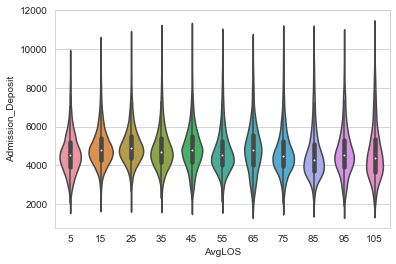

In [118]:
#sns.scatterplot(x='AvgLOS', y='Admission_Deposit', data=df)
sns.violinplot(data=df, y='Admission_Deposit', x='AvgLOS')

In [119]:
list1 = []
mylabels = ['Z', 'Y','X']
for reg in mylabels:
    list1.append(df[df['Hospital_region_code'] == reg].Stay.sort_values())


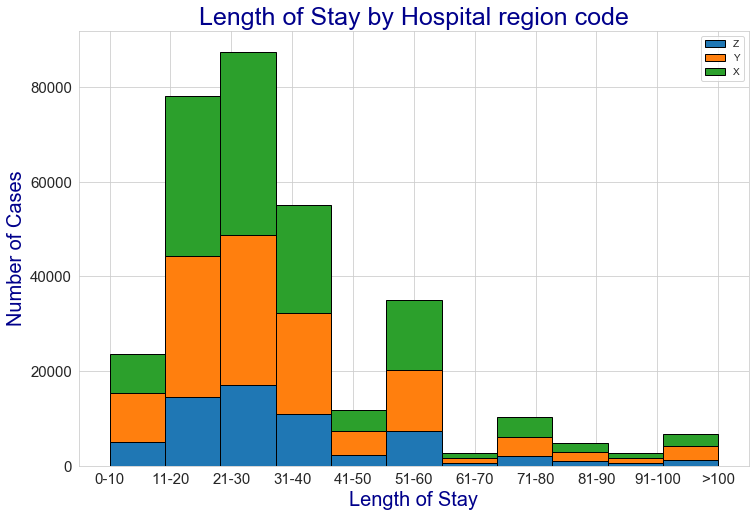

In [120]:
sns.set_style('whitegrid')
fig, ax=plt.subplots()
fig.set_size_inches(12,8) 
plt.hist(list1, bins = 11, edgecolor='black',stacked=True, rwidth=1, label=mylabels)
plt.title('Length of Stay by Hospital region code', fontsize=25, color='DarkBlue')
plt.ylabel('Number of Cases', fontsize=20, color='DarkBlue')
plt.xlabel('Length of Stay', fontsize=20, color='DarkBlue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(prop={"size":40},frameon=True,fancybox=True, shadow=True, framealpha=2,loc=4 )
plt.legend()
plt.show()

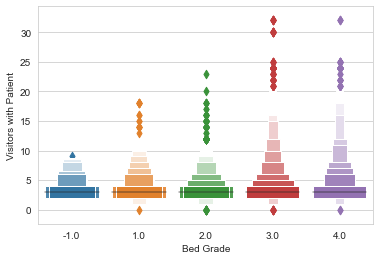

In [121]:
sns.boxenplot(x='Bed Grade', y='Visitors with Patient',scale='area', data=df)

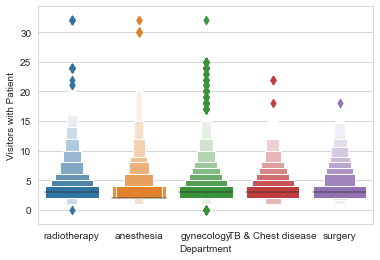

In [122]:
sns.boxenplot(x='Department', y='Visitors with Patient',scale='area', data=df)
#sns.scatterplot(x='Department', y='Visitors with Patient', data=df)

## Data Modelling

In [123]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'AvgLOS'],
      dtype='object')

In [124]:
import xgboost as xgb
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import RepeatedStratifiedKFold

In [125]:
mod1 = xgb.XGBClassifier()

In [126]:
pipe = make_pipeline(OrdinalEncoder(), mod1)
X = df.drop(['Stay', 'case_id','patientid', 'AvgLOS'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=True)

In [127]:
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [128]:
pipe.steps[1][1].set_params(max_depth=3,objective='multi:softmax',learning_rate=0.1, n_estimators=100,scale_pos_weight=None, num_class=11, eval_metric='merror')

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='merror', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=11,
              num_parallel_tree=None, objective='multi:softmax',
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [129]:
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=None)

In [130]:
print('Mean score: %.5f' % scores.mean())


Mean score: 0.40689


In [131]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4066700163296068

In [132]:
feats = pd.DataFrame({ 'Importance': pipe.steps[1][1].feature_importances_, 'Column': X.columns})
feats.sort_values(by='Importance', ascending=False)

,Importance,Column
12,0.236197,Visitors with Patient
10,0.148306,Type of Admission
4,0.097421,Available Extra Rooms in Hospital
8,0.096506,Bed Grade
6,0.087478,Ward_Type
3,0.069015,Hospital_region_code
7,0.049536,Ward_Facility_Code
11,0.045794,Severity of Illness
0,0.032614,Hospital_code
14,0.030201,Admission_Deposit


## Feature Engineering

In [138]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'AvgLOS'],
      dtype='object')

In [139]:
#Calculate count fraction for each 'Stay' class. Unbalanced classes
for days in stay_bins:
    count_stay=df[df.Stay==days]['Stay'].count()
    print(days, " ", "{:.2f}".format( 100*count_stay/df.shape[0]))   

0-10   7.41
11-20   24.54
21-30   27.48
31-40   17.32
41-50   3.69
51-60   11.00
61-70   0.86
71-80   3.22
81-90   1.52
91-100   0.87
>100   2.10


In [140]:
Sum_AD=df.groupby('patientid')[['Admission_Deposit']].sum().reset_index().rename({'Admission_Deposit': 'Patient_AD_SUM'}, axis=1)
Sum_AD

,patientid,Patient_AD_SUM
0,1,20856.0
1,2,11452.0
2,4,10244.0
3,6,5918.0
4,7,22288.0
...,...,...
92012,131620,36219.0
92013,131621,21446.0
92014,131622,18001.0
92015,131623,8355.0


In [141]:
df=df.merge(Sum_AD, on='patientid')

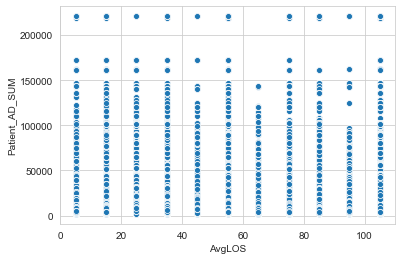

In [142]:
sns.scatterplot(x='AvgLOS', y='Patient_AD_SUM', data=df)

In [143]:
Avg_AD=df.groupby('patientid')[['Admission_Deposit']].mean().reset_index().rename({'Admission_Deposit': 'Patient_AD_AVG'}, axis=1)
Avg_AD

,patientid,Patient_AD_AVG
0,1,5214.000000
1,2,5726.000000
2,4,5122.000000
3,6,5918.000000
4,7,5572.000000
...,...,...
92012,131620,4024.333252
92013,131621,7148.666504
92014,131622,4500.250000
92015,131623,4177.500000


In [144]:
df=df.merge(Avg_AD, on='patientid')

In [145]:
X = df.drop(['Stay', 'case_id','patientid', 'AvgLOS'], axis=1)
y = df['Stay']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=True, stratify=None)

In [146]:
pipe.steps[1][1].set_params(max_depth=3,objective='multi:softmax',learning_rate=0.1, n_estimators=100,scale_pos_weight=None, num_class=11, eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=11, num_parallel_tree=1, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [147]:
scores = cross_val_score(pipe, X_train, y_train, cv=cv)

In [148]:
scores.mean()

0.4058684985279685

In [149]:
pipe.fit(X_train,  y_train)
pipe.score(X_test, y_test)

0.4055238035422686

In [150]:
pipe.steps[1][1].feature_importances_

array([0.03332877, 0.02076932, 0.02683498, 0.06251948, 0.09578378,
       0.01915251, 0.08424815, 0.04639002, 0.09007682, 0.02757294,
       0.14303821, 0.04200637, 0.22622891, 0.02063541, 0.03132582,
       0.01893088, 0.01115766], dtype=float32)

In [151]:
feats = pd.DataFrame({ 'Importance': pipe.steps[1][1].feature_importances_, 'Column': X.columns})
feats.sort_values(by='Importance', ascending=False)

,Importance,Column
12,0.226229,Visitors with Patient
10,0.143038,Type of Admission
4,0.095784,Available Extra Rooms in Hospital
8,0.090077,Bed Grade
6,0.084248,Ward_Type
3,0.062519,Hospital_region_code
7,0.046390,Ward_Facility_Code
11,0.042006,Severity of Illness
0,0.033329,Hospital_code
14,0.031326,Admission_Deposit


In [152]:
df.drop(['Patient_AD_AVG', 'Patient_AD_SUM'], axis=1, inplace=True) ## No improvement with the added features

In [153]:
X = df.drop(['Stay', 'case_id','patientid', 'AvgLOS'], axis=1)
y = df['Stay']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train, test_size=0.20, random_state=65, shuffle=True, stratify=y_train)
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [154]:
pipe.steps[1][1].set_params(max_depth=5,objective='multi:softmax',learning_rate=0.1, n_estimators=1000,scale_pos_weight=None, num_class=11, eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_class=11, num_parallel_tree=1, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [155]:
pipe.fit(X_train,  y_train)
pipe.score(X_val, y_val)

0.4234543670264966

### Rebuild the training set and score on the test set

In [156]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [157]:
pipe.fit(X_train,  y_train)
pipe.score(X_test, y_test)

0.42543336264288406

Text(0.5, 1.0, 'Confusion Matrix')

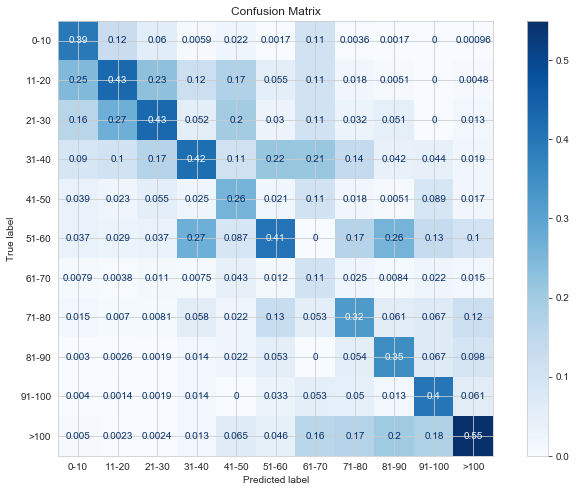

In [158]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(12,8))
plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Blues,normalize='pred', ax=ax);
plt.title('Confusion Matrix')

In [159]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

        0-10       0.39      0.17      0.24      4721
       11-20       0.43      0.50      0.46     15628
       21-30       0.43      0.66      0.52     17498
       31-40       0.42      0.23      0.30     11032
       41-50       0.26      0.01      0.01      2349
       51-60       0.41      0.49      0.44      7004
       61-70       0.11      0.00      0.01       549
       71-80       0.32      0.04      0.08      2051
       81-90       0.35      0.22      0.27       967
      91-100       0.40      0.03      0.06       553
        >100       0.55      0.43      0.48      1336

    accuracy                           0.43     63688
   macro avg       0.37      0.25      0.26     63688
weighted avg       0.41      0.43      0.39     63688



In [160]:
from sklearn.metrics import f1_score

y_true = np.where(y_test == '>100', 1, 0)
y_pred = np.where(pipe.predict(X_test) == '>100', 1, 0)
# f1 score
f1_score(y_true, y_pred)

0.48127892301220027

In [161]:
pipe.predict(X_test)

array(['11-20', '51-60', '51-60', ..., '51-60', '21-30', '21-30'],
      dtype=object)

In [162]:
pipe.predict_proba(X_test)


array([[8.7487251e-03, 4.4290677e-01, 3.8832924e-01, ..., 2.0842481e-04,
        1.2521772e-04, 7.0068933e-04],
       [1.1208260e-05, 3.2031763e-02, 1.1245491e-02, ..., 1.1914906e-01,
        9.4387503e-03, 8.0247186e-02],
       [7.4664354e-06, 7.8511931e-02, 1.1089916e-02, ..., 7.3352076e-02,
        5.6534763e-03, 2.6989402e-02],
       ...,
       [1.1723224e-03, 5.4618888e-02, 6.4399630e-02, ..., 5.0087133e-03,
        2.1747649e-02, 8.3463946e-03],
       [6.3342191e-02, 3.1006947e-01, 3.4664109e-01, ..., 1.4106646e-03,
        3.6217980e-03, 3.4993901e-03],
       [7.5525671e-02, 2.1923478e-01, 4.1707447e-01, ..., 3.4586727e-03,
        1.7066366e-03, 1.5446281e-03]], dtype=float32)

In [163]:
y_true = np.where(y_test == '11-20', 1, 0)
y_pred = np.where(pipe.predict(X_test) == '11-20', 1, 0)

In [164]:
f1_score(y_true, y_pred)

0.463062636777666